## Predicting Optimal Fertilizers

* This notebook consists my submissions for the Kaggle Playground Series' competition - Predicting Optimal Fertilizers.

### ‎

In [ ]:
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/optimal-fertilizers/train.csv
/kaggle/input/optimal-fertilizers/test.csv


In [ ]:
#Importing the datasets

train = pd.read_csv("/kaggle/input/optimal-fertilizers/train.csv")
test = pd.read_csv("/kaggle/input/optimal-fertilizers/test.csv")

In [ ]:
#Printing the first few rows from each of the dataframes
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [ ]:
test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


## EDA

In [ ]:
# Summary of various columns in the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


* Excluding the "id" column, there are 6 integer type and 3 object type columns.
* Noticeably, the target variable "Fertilizer Name" is object type

In [ ]:
#Checking for NULL values

train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

* No NULL values in the data

In [ ]:
#Creating a list of numerical columns

num_train = train.select_dtypes(include = ["int64"])

num_train.drop("id", axis=1, inplace=True)

num_train.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,37,70,36,36,4,5
1,27,69,65,30,6,18
2,29,63,32,24,12,16
3,35,62,54,39,12,4
4,35,58,43,37,2,16


In [ ]:
#Checking for "+/- infinite" values in the numerical columns

np.isinf(num_train).any()

Temparature    False
Humidity       False
Moisture       False
Nitrogen       False
Potassium      False
Phosphorous    False
dtype: bool

* No column has any "infinite" value

In [ ]:
# Summarizing the numerical columns

num_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,750000.0,31.503565,4.025574,25.0,28.0,32.0,35.0,38.0
Humidity,750000.0,61.038912,6.647695,50.0,55.0,61.0,67.0,72.0
Moisture,750000.0,45.184147,11.794594,25.0,35.0,45.0,55.0,65.0
Nitrogen,750000.0,23.093808,11.216125,4.0,13.0,23.0,33.0,42.0
Potassium,750000.0,9.478296,5.765622,0.0,4.0,9.0,14.0,19.0
Phosphorous,750000.0,21.073227,12.346831,0.0,10.0,21.0,32.0,42.0


* One intereseting thing to notice in this data is how the "Mean" of each of the numerical variables from "train" dataframe is almost equals to the Arthematic Mean of it's Maximum and Minimum values

In [ ]:
#Checking for duplicate values in data

train.duplicated().sum()

0

* No duplicate values exist in the dataframe

### Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#### Analysis of Numerical Columns from Training data

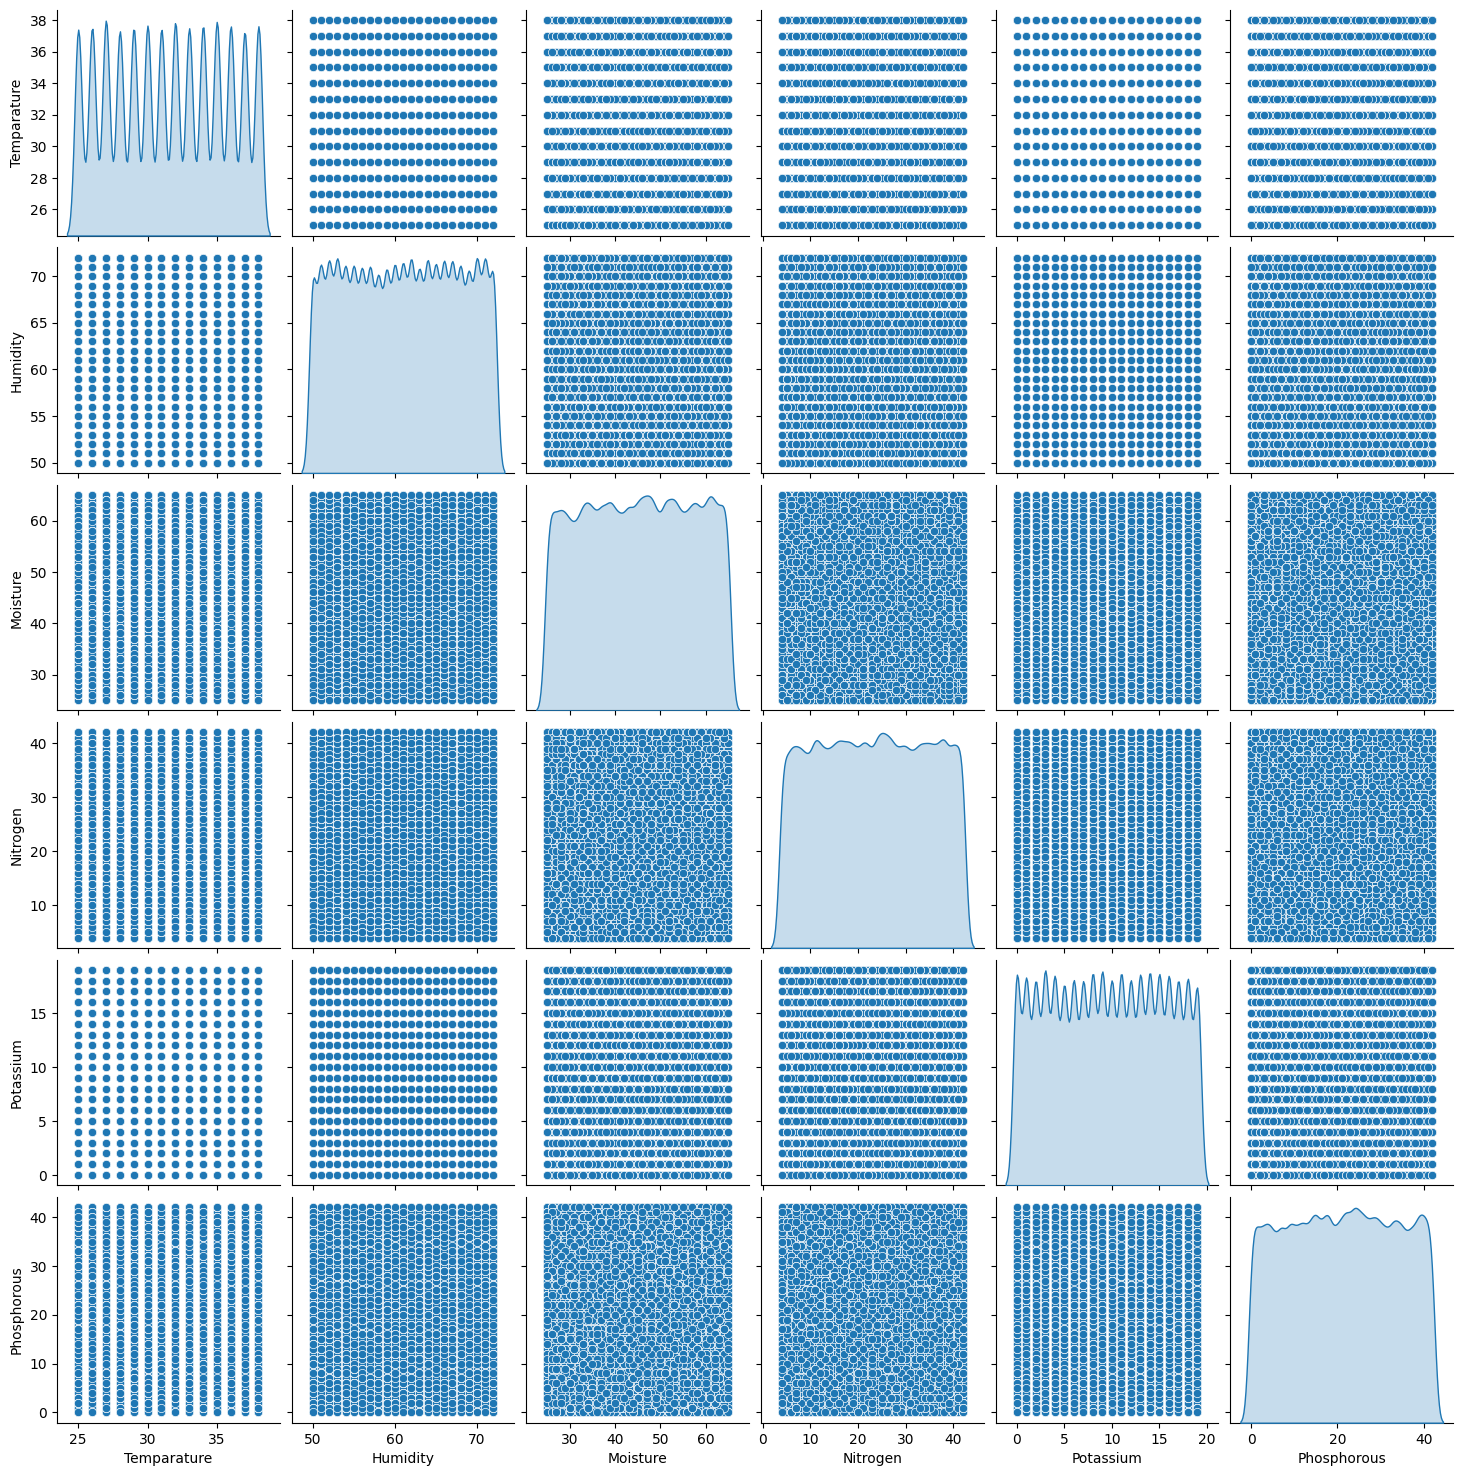

In [ ]:
# Creating a Pairplot

sns.pairplot(num_train, diag_kind = 'kde')

* The pair plots aren't of much help to determine any patterns/ relations in the numerical variables

<Axes: >

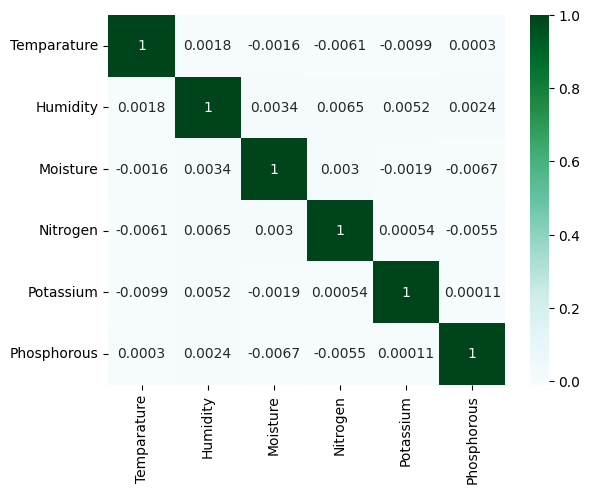

In [ ]:
# Creating a correaltion heatmap

sns.heatmap(num_train.corr(), annot = True, cmap= 'BuGn')

* The pair plot confirms the previous results - NO correlation exists between the numerical variables

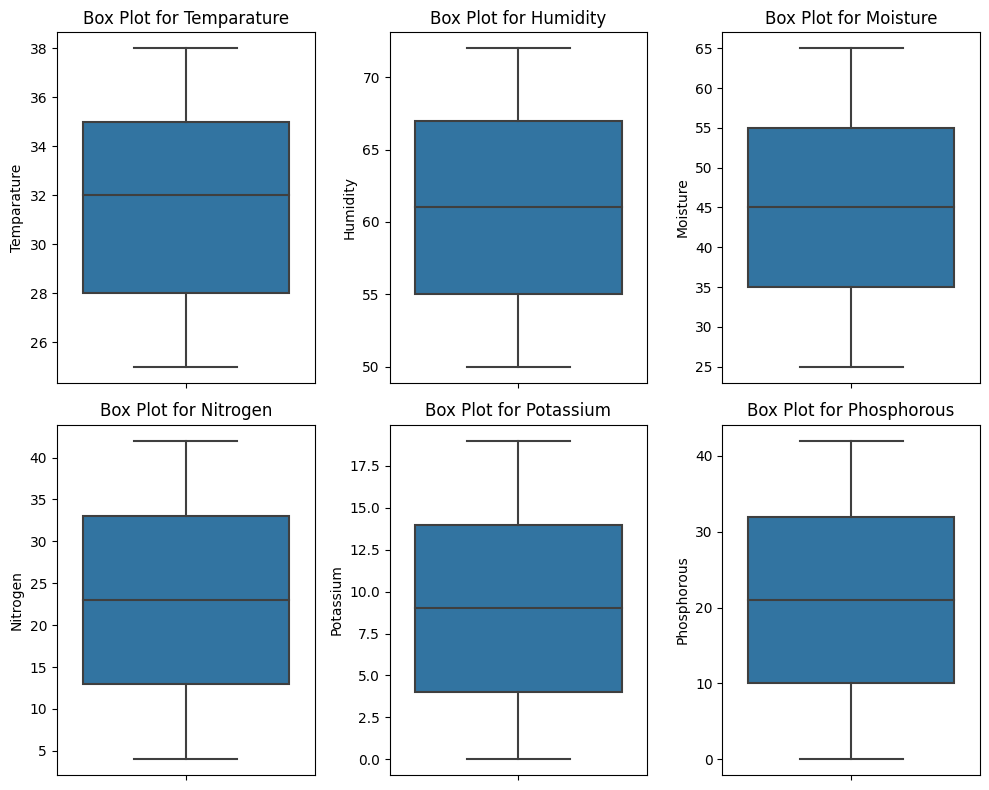

In [ ]:
# Checking for outliers in the numerical colums

fig = plt.figure(figsize=(10,8))
axes = fig.subplots(2,3)

axes = axes.flatten()

for index,col in enumerate(num_train.columns):
    sns.boxplot(y=num_train[col], ax=axes[index])
    axes[index].set_title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

* There are no outliers in the Numeric Columns

## Analysis of Categorical Columns

In [ ]:
cat_train = train.select_dtypes(include = ["object"])
cat_train.head()

,Soil Type,Crop Type,Fertilizer Name
0,Clayey,Sugarcane,28-28
1,Sandy,Millets,28-28
2,Sandy,Millets,17-17-17
3,Sandy,Barley,10-26-26
4,Red,Paddy,DAP


In [ ]:
# Calculating the counts of classes for each Categorical Column

for col in cat_train.columns:
    print(cat_train[col].value_counts(), "\n")

Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64 

Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64 

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64 



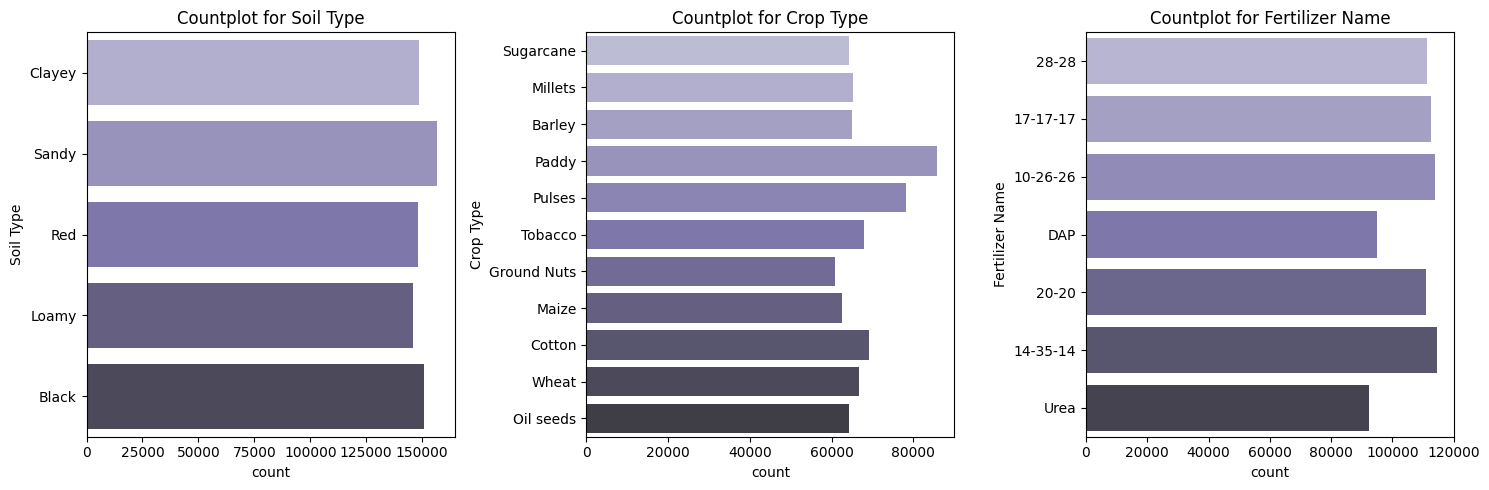

In [ ]:
# Visualizing the distribution of classes

fig = plt.figure(figsize = (15,5))
axes = fig.subplots(1,3)

axes = axes.flatten()

for ind, col in enumerate(cat_train.columns):
    sns.countplot(y = cat_train[col], ax = axes[ind], palette = 'Purples_d')
    axes[ind].set_title(f"Countplot for {col}")

plt.tight_layout()
plt.show()

In [ ]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


### Bi-variate Analysis

In [ ]:
# Grouped Barplots

def grpBarPlts(x_data, y_data, Hue = None):
    plt.figure(figsize=(10,8))
    sns.catplot(data = train, x= x_data, y= y_data, hue= Hue)
    plt.xticks(rotation=30)
    plt.show()

<Figure size 1000x800 with 0 Axes>

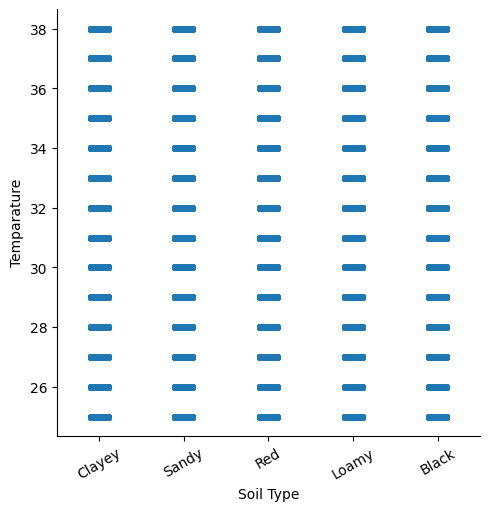

In [ ]:
# Understanding the relationship between "Soil Type" and "Temparature"

grpBarPlts(train['Soil Type'], train['Temparature'])

<Figure size 1000x800 with 0 Axes>

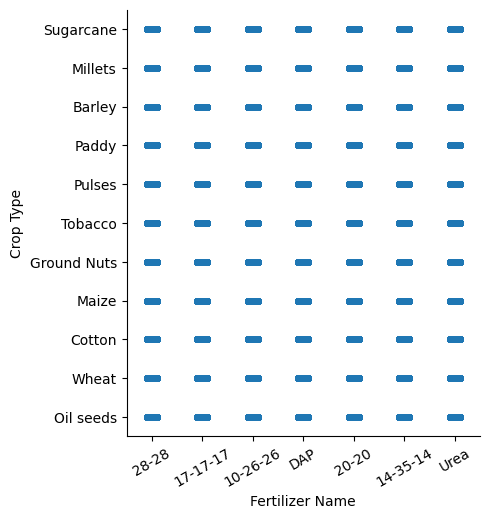

In [ ]:
# "Fertilizer Name" and "Crop Type"

grpBarPlts(train['Fertilizer Name'], train['Crop Type'])

* There's no inference on relationship between data even after using Barplots

In [ ]:
'''
Using KNN to figure out any relation between "Fertilizer Name" and
chemicals present in soil like "Nitrogen", "Potassium", and "Phosphorous"

> Since "Fertilizer Name" is Categorical and KNN only accepts numerical data, OHE is used to convert the columns
'''

# Creating a dataset for KNN

knn_df = train[["id","Nitrogen", "Potassium", "Phosphorous", "Fertilizer Name"]]
knn_df.head()

,id,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,36,4,5,28-28
1,1,30,6,18,28-28
2,2,24,12,16,17-17-17
3,3,39,12,4,10-26-26
4,4,37,2,16,DAP


In [ ]:
#Setting the index
knn_df.set_index("id", inplace= True)
knn_df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,
0,36,4,5,28-28
1,30,6,18,28-28
2,24,12,16,17-17-17
3,39,12,4,10-26-26
4,37,2,16,DAP


In [ ]:
# OHE

ohe = pd.get_dummies(knn_df["Fertilizer Name"], dtype = int)

ohe.head()

,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
id,,,,,,,
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [ ]:
# Normalizing other Numerical from "knn_df" other than the OHE ones

from sklearn.preprocessing import StandardScaler

knn_df.drop("Fertilizer Name", axis = 1, inplace=True)

ss_knn_array = StandardScaler().fit_transform(knn_df)

cols = list(knn_df.columns)

ss_knn = pd.DataFrame(ss_knn_array, columns = cols)

ss_knn.head()

,Nitrogen,Potassium,Phosphorous
0,1.150683,-0.950166,-1.301811
1,0.615738,-0.603282,-0.248908
2,0.080794,0.437369,-0.410893
3,1.418155,0.437369,-1.382803
4,1.239840,-1.297050,-0.410893


In [ ]:
df_knn = pd.concat([ss_knn,ohe], axis=1)

df_knn.head()

,Nitrogen,Potassium,Phosphorous,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,1.150683,-0.950166,-1.301811,0,0,0,0,1,0,0
1,0.615738,-0.603282,-0.248908,0,0,0,0,1,0,0
2,0.080794,0.437369,-0.410893,0,0,1,0,0,0,0
3,1.418155,0.437369,-1.382803,1,0,0,0,0,0,0
4,1.239840,-1.297050,-0.410893,0,0,0,0,0,1,0


In [ ]:
# Using KNN

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 8, random_state=79)

km.fit(df_knn)

KMeans(random_state=79)

In [ ]:
labels = km.predict(df_knn)

In [ ]:
labels

array([2, 2, 5, ..., 7, 0, 0], dtype=int32)

##### Visualizing the Clusters
- using PCA for dimenstion-reductionality

In [ ]:
from sklearn.decomposition import PCA

pca_values = PCA(n_components=2).fit_transform(df_knn)

In [ ]:
label_series = pd.DataFrame(labels, columns=["label"])
pca_value_df = pd.DataFrame(pca_values, columns = ['Dim1', 'Dim2'])

In [ ]:
label_series

,label
0,2
1,2
2,5
3,5
4,2
...,...
749995,0
749996,2
749997,7
749998,0


In [ ]:
pca_df = pd.concat([pca_value_df,label_series], axis=1)

pca_df.head()

,Dim1,Dim2,label
0,-1.679110,-1.049307,2
1,-0.577569,-0.611870,2
2,-0.372210,0.397547,5
3,-2.003856,0.331226,5
4,-1.096814,-1.310357,2


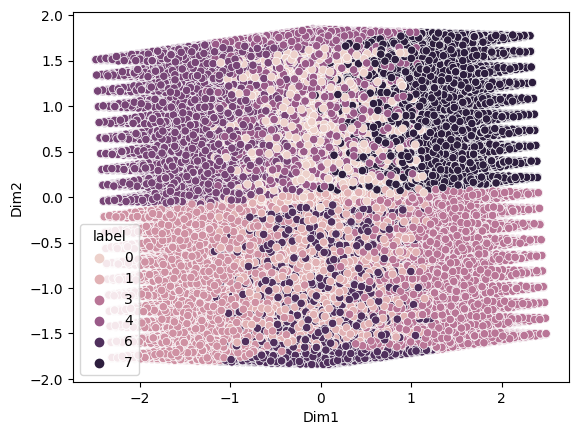

In [ ]:
# Plots
sns.scatterplot(data=pca_df, x="Dim1", y="Dim2", hue= "label")
plt.show()

### Assumption:
* 1. Underylying assumption on using K-Means was to determine if the `Fertilizer Type` was dependent on the chemical composition of the soil, i.e., presence of `Nitrogen`, `Potassium`, `Phosphorous` had some impact on the choice of "Fertilizer Used" as would be case with real world.

**Observation**: KMeans data doesn't indicate any relationship between these variables either.

_Unexplored avenues_:
* Impact of `Crop Type` on the Fertilizer.

### Findings from EDA:

* The plots used in the notebook strongly suggest the lack of relation between data and the target variable.
* This impacts prediction capabilities of Models used

-----------------

# Model-1
## Multinomial Regression

In [ ]:
# preparing the data for Multinomial Regressor

train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [ ]:
# OHE the categorical variables - "Soil Type" and "Crop Type"

categ = train[["Soil Type", "Crop Type"]]

categ_ohe = pd.get_dummies(categ, dtype=int)

categ_ohe.head()

,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Appending the "categ_ohe" dataframe

train_df = train.drop(["Soil Type", "Crop Type", "Fertilizer Name"], axis=1)
train_df.head()

# 'X' contains the data for the "Multinomial Regression"

X1 = pd.concat([train_df,categ_ohe], axis=1)
X1.head()

# Setting the "id" as the index for the "mr_df"

X1.set_index("id", inplace=True)
X1.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
id,,,,,,,,,,,,,,,,,,,,,
0,37,70,36,36,4,5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,27,69,65,30,6,18,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,29,63,32,24,12,16,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,35,62,54,39,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,58,43,37,2,16,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Label Encoding the target variable "Fertilizer Name"

y1 = train["Fertilizer Name"]
y1.head

# Using LabelEncoder from sklear

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y1)

y_le = le.transform(y1)

y_le = pd.DataFrame(y_le, columns = ["Fertilizer"])

y_le.head()

,Fertilizer
0,4
1,4
2,2
3,0
4,5


In [ ]:
# Checking for the classes in LableEncoder

le.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [ ]:
# Using Multinomial Regression

from sklearn.linear_model import LogisticRegression

mr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

#### **** Considering this is a Kaggle Competetion, I'm not splitting my data into train-test sets. I'm not expecting to perform hypertuning on my base Multinomial Regression Model ****

In [ ]:
mr.fit(X1, y_le)

LogisticRegression(multi_class='multinomial')

In [ ]:
# Modifying the "test" data to predict y_test

test.head()

# 1. OHE the categorical columns

test_cat = test[["Soil Type","Crop Type"]]
test_cat_ohe = pd.get_dummies(test_cat, dtype= int)

test_cat_ohe.head()

# 2. Joining the OHE with the "test" dataframe - and excluding the original "Soil Type", and "Crop Type" columns

test_df = test.drop(["Soil Type", "Crop Type"], axis=1)
test_df.head()

# 3. Joining dataframes from #1 and #2

test_X1 = pd.concat([test_df, test_cat_ohe], axis=1)

# 4. Setting the index to "id" column

test_X1.set_index("id", inplace = True)

test_X1.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
id,,,,,,,,,,,,,,,,,,,,,
750000,31,70,52,34,11,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
750001,27,62,45,30,14,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
750002,28,72,28,14,15,4,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
750003,37,53,57,18,17,36,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
750004,31,55,32,13,19,14,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Predicting the test Fertilizers

yTest_le = mr.predict(test_X1)

In [ ]:
yTest_probs = mr.predict_proba(test_X1)
yTest_probs[0]

array([0.14522529, 0.13522064, 0.14328002, 0.15117392, 0.14872233,
       0.13959803, 0.13677977])

### Note:
1. The submission guidelines at Kaggle require the model to output the top-3 fertilizers to be used in a given case. These probabilities will be ranked using the `MAP@3 - Mean Average Precision @ top-3`logic.

In [ ]:
# Getting the "indexes" of the top classes for each row from "yTest_probs"

top3_ind_asc = np.argsort(yTest_probs, axis=1)[:,-3:]

# The argsort() sorts the data in ascending order and will return the top-3 probable class in ascending order.
# Reversing the order of probabilities to get the classes in descending order

top3_ind = top3_ind_asc[:,::-1]
top3_ind

array([[3, 4, 0],
       [3, 1, 2],
       [2, 0, 3],
       ...,
       [1, 0, 4],
       [2, 0, 4],
       [2, 4, 0]])

In [ ]:
# Extracting the Classes based on indices

top3_probs_mr = np.take_along_axis(yTest_probs, top3_ind, axis=1)
top3_probs_mr
top3_classes_mr_le = mr.classes_[top3_ind]
top3_classes_mr_le

array([[3, 4, 0],
       [3, 1, 2],
       [2, 0, 3],
       ...,
       [1, 0, 4],
       [2, 0, 4],
       [2, 4, 0]])

In [ ]:
top3_classes_mr_le_df = pd.DataFrame(top3_classes_mr_le, columns = ["Class1","Class2", "Class3"])
top3_classes_mr_le_df.head()

,Class1,Class2,Class3
0,3,4,0
1,3,1,2
2,2,0,3
3,1,0,3
4,2,1,3


In [ ]:
# "res" used to get the 'Actual' classes

res = top3_classes_mr_le_df

# empty list to store the columns which need to be deleted in future from "res" dataframe
del_ls = []

for i in top3_classes_mr_le_df.columns:
    del_ls.append(i)
    temp = le.inverse_transform(top3_classes_mr_le_df[i])
    temp_df = pd.DataFrame(temp, columns = [f"{i}_actual"])
    res = pd.concat([res, temp_df], axis=1)

In [ ]:
res.drop(del_ls, axis=1, inplace=True)
res.head()

,Class1_actual,Class2_actual,Class3_actual
0,20-20,28-28,10-26-26
1,20-20,14-35-14,17-17-17
2,17-17-17,10-26-26,20-20
3,14-35-14,10-26-26,20-20
4,17-17-17,14-35-14,20-20


In [ ]:
prefinal_result_mr = res["Class1_actual"] + " " + res["Class2_actual"] + " " + res["Class3_actual"]
final_result_mr = pd.DataFrame(prefinal_result_mr, columns = ["Fertilizer Name"])
final_result_mr.head()

,Fertilizer Name
0,20-20 28-28 10-26-26
1,20-20 14-35-14 17-17-17
2,17-17-17 10-26-26 20-20
3,14-35-14 10-26-26 20-20
4,17-17-17 14-35-14 20-20


In [ ]:
# Joining the above final predictions with "test" dataframe to get the "id" column

pre_submission_1 = pd.concat([test,final_result_mr], axis=1)
pre_submission_1b = pre_submission_1[["id", "Fertilizer Name"]]
pre_submission_1b.head()

,id,Fertilizer Name
0,750000,20-20 28-28 10-26-26
1,750001,20-20 14-35-14 17-17-17
2,750002,17-17-17 10-26-26 20-20
3,750003,14-35-14 10-26-26 20-20
4,750004,17-17-17 14-35-14 20-20


In [ ]:
pre_submission_1b.isnull().sum()

id                 0
Fertilizer Name    0
dtype: int64

In [ ]:
# pre_submission_1b.to_csv("/kaggle/working/submission_mr_1.csv", index=False)

### Results:
- According to the submitted data, the basic Multinomila Model - `mr` scored a MAP@3 of "0.29"

-----------------------------

## Multinomial Regression with PCA
- Understanding if using PCA helps in better model performance

In [ ]:
train_df.head()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,0,37,70,36,36,4,5
1,1,27,69,65,30,6,18
2,2,29,63,32,24,12,16
3,3,35,62,54,39,12,4
4,4,35,58,43,37,2,16


In [ ]:
# Using the same "trian" data from previous model

train_df.set_index("id", inplace=True)
train_df.head()

# PCA requires scaling of variables, hence using a StandardScaler()

from sklearn.preprocessing import StandardScaler

ss_pca = StandardScaler()

ss_pca.fit(train_df)

train_df_ss_arr = ss_pca.transform(train_df)
train_df_ss_arr

train_df_ss = pd.DataFrame(train_df_ss_arr, columns = train_df.columns)
train_df_ss.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,1.365380,1.348000,-0.778675,1.150683,-0.950166,-1.301811
1,-1.118740,1.197572,1.680080,0.615738,-0.603282,-0.248908
2,-0.621916,0.295003,-1.117813,0.080794,0.437369,-0.410893
3,0.868556,0.144575,0.747449,1.418155,0.437369,-1.382803
4,0.868556,-0.457138,-0.185182,1.239840,-1.297050,-0.410893


In [ ]:
# The categorical variables - "Soil Type" and "Crop Type" were already converted to OHE - using the same DF again

categ_ohe.head()

X_pre_pca = pd.concat([train_df_ss,categ_ohe], axis=1)
X_pre_pca.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,1.365380,1.348000,-0.778675,1.150683,-0.950166,-1.301811,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.118740,1.197572,1.680080,0.615738,-0.603282,-0.248908,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.621916,0.295003,-1.117813,0.080794,0.437369,-0.410893,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.868556,0.144575,0.747449,1.418155,0.437369,-1.382803,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.868556,-0.457138,-0.185182,1.239840,-1.297050,-0.410893,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# PCA

from sklearn.decomposition import PCA

pca_train_data = PCA()

X_pca_all = pca_train_data.fit_transform(X_pre_pca)
X_pca_all

array([[-1.17900597e-01, -1.44301657e+00, -1.41517380e+00, ...,
        -1.10965749e-01,  3.59188794e-14, -1.62948150e-15],
       [-1.62606994e+00, -9.98973701e-01, -5.35004978e-01, ...,
        -8.86313337e-02,  3.40495746e-15, -9.27846033e-16],
       [-4.09799951e-01,  8.08962960e-01,  2.36740320e-01, ...,
        -8.76357139e-02,  6.68070187e-16, -2.24788725e-16],
       ...,
       [ 5.81517790e-01, -6.74792456e-02, -1.25093900e+00, ...,
         9.30038539e-01, -3.59349134e-17, -3.39411864e-17],
       [ 3.47216267e-01,  8.02593869e-01, -2.67623396e-01, ...,
        -4.42038097e-02,  4.12910296e-17, -1.41271250e-18],
       [ 1.50455012e+00,  4.09261618e-01,  1.21157481e+00, ...,
        -4.47649513e-02,  8.77157477e-19, -4.74730608e-19]])

In [ ]:
pca_train_data.explained_variance_ratio_

array([1.31687224e-01, 1.30868945e-01, 1.30122051e-01, 1.29245242e-01,
       1.28899323e-01, 1.27618712e-01, 2.68224024e-02, 2.59697236e-02,
       2.56447472e-02, 2.53417707e-02, 1.45004674e-02, 1.32229750e-02,
       1.18967927e-02, 1.16755647e-02, 1.14480111e-02, 1.12695290e-02,
       1.11823099e-02, 1.11041565e-02, 1.08817901e-02, 1.05982632e-02,
       9.76205405e-34, 1.48100244e-34])

In [ ]:
cumulative_var = np.cumsum(pca_train_data.explained_variance_ratio_)

cumulative_var

array([0.13168722, 0.26255617, 0.39267822, 0.52192346, 0.65082278,
       0.7784415 , 0.8052639 , 0.83123362, 0.85687837, 0.88222014,
       0.89672061, 0.90994358, 0.92184038, 0.93351594, 0.94496395,
       0.95623348, 0.96741579, 0.97851995, 0.98940174, 1.        ,
       1.        , 1.        ])

In [ ]:
# Selecting those components which can explain 90% of the variation in data

req_components = np.argmax(cumulative_var>=0.9) + 1 #Adding one since the component counts starts from 0
req_components

12

In [ ]:
# Re-transforming my training data into 12 components using PCA

pca12 = PCA(n_components = req_components)

X_pca12_arr = pca12.fit_transform(X_pre_pca)

X_pca12 = pd.DataFrame(X_pca12_arr, columns = [f"PCA_{i}" for i in range(12)])

X_pca12.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11
0,-0.117901,-1.443017,-1.415174,1.352727,1.430113,0.484061,-0.213810,-0.417996,-0.706755,-0.293019,-0.070449,-0.120198
1,-1.626070,-0.998974,-0.535005,-0.463464,-1.236502,0.806646,0.869272,0.104285,-0.009533,-0.066532,-0.087512,-0.141433
2,-0.409800,0.808963,0.236740,0.557295,0.728675,0.613356,0.866052,0.113385,-0.007791,-0.066462,-0.083492,-0.133911
3,-1.180825,-1.464144,-0.183125,0.276731,0.967194,-0.929057,0.884969,0.113363,-0.014318,-0.039530,-0.085562,-0.127301
4,0.425587,-1.391281,-0.141036,1.449176,-0.017794,-0.385291,-0.200779,-0.344586,0.713469,-0.350814,0.920290,0.170474


In [ ]:
# Using the PCA data into my Multinomial Model

from sklearn.linear_model import LogisticRegression

mr2 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [ ]:
# Using the same target variable as in `mr`

mr2.fit(X_pca12, y_le)

LogisticRegression(multi_class='multinomial')

In [ ]:
# Using the test data from previous model

test_df.set_index("id", inplace=True)
test_df.head()

# Scaling of variables

ss_pca.fit(test_df)

test_df_ss_arr = ss_pca.transform(test_df)
test_df_ss_arr

test_df_ss = pd.DataFrame(test_df_ss_arr, columns = test_df.columns)
test_df_ss.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,-0.122176,1.349366,0.577417,0.968300,0.262229,0.232451
1,-1.116191,0.143886,-0.016149,0.611664,0.782444,-0.494478
2,-0.867687,1.650737,-1.457664,-0.814877,0.955849,-1.382948
3,1.368846,-1.212279,1.001392,-0.458242,1.302659,1.201690
4,-0.122176,-0.910909,-1.118484,-0.904036,1.649469,-0.575248


In [ ]:
# Categorical columns from "test" which were transformed earlier

test_cat_ohe.head()

test_X_pre_pca = pd.concat([test_df_ss, test_cat_ohe], axis=1)

test_X_pre_pca.head()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,-0.122176,1.349366,0.577417,0.968300,0.262229,0.232451,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.116191,0.143886,-0.016149,0.611664,0.782444,-0.494478,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.867687,1.650737,-1.457664,-0.814877,0.955849,-1.382948,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.368846,-1.212279,1.001392,-0.458242,1.302659,1.201690,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.122176,-0.910909,-1.118484,-0.904036,1.649469,-0.575248,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:

# ---------------------------------------------------

# Transforming test data into 12 components using PCA


test_X_pca12_arr = pca12.fit_transform(test_X_pre_pca)

test_X_pca12 = pd.DataFrame(test_X_pca12_arr, columns = [f"PCA_{i}" for i in range(12)])

test_X_pca12.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11
0,1.049118,0.295670,-0.401509,-1.333130,0.247637,-0.241347,0.867483,0.044311,-0.055498,-0.069902,-0.079967,-0.158545
1,1.433386,-0.330496,-0.000136,0.187054,-0.533603,0.097206,-0.214960,-0.170753,0.756211,-0.386307,-0.086344,-0.133694
2,0.536737,-0.068648,-1.390274,-0.240730,-2.532912,0.621216,-0.261124,-0.584216,-0.576101,-0.230758,-0.047295,-0.088584
3,-0.435392,0.502223,-0.770419,1.355637,1.697714,-1.396403,-0.304828,0.787644,-0.244073,-0.164938,-0.082969,-0.107285
4,-0.005609,-0.382680,-0.770635,1.852208,-1.204386,-0.587918,-0.207154,-0.177393,0.757101,-0.386859,-0.333790,0.878183


In [ ]:
# ----------------------------------------------------

# Predicting the test Fertilizers

yTest_le_pca = mr2.predict(test_X_pca12)

yTest_probs_pca = mr2.predict_proba(test_X_pca12)

yTest_probs_pca[0]

array([0.14173857, 0.14893028, 0.13992707, 0.15018267, 0.15722614,
       0.12837154, 0.13362373])

In [ ]:
# Extracting the top 3 classes for each "id"

top3_ind_asc_pca = np.argsort(yTest_probs_pca, axis=1)[:,-3:]

top3_ind_pca = top3_ind_asc_pca[:,::-1]
top3_ind_pca

top3_classes_pca = mr2.classes_[top3_ind_pca]
top3_classes_pca

top3_classes_pca_df = pd.DataFrame(top3_classes_pca, columns = ["Class1","Class2", "Class3"])
top3_classes_pca_df.head()

,Class1,Class2,Class3
0,4,3,1
1,1,4,2
2,4,1,3
3,0,1,2
4,1,2,3


In [ ]:
# "res" used to get the 'Actual' classes

res2 = top3_classes_mr_le_df

# empty list to store the columns which need to be deleted in future from "res" dataframe
del_ls = []

for i in top3_classes_mr_le_df.columns:
    del_ls.append(i)
    temp = le.inverse_transform(top3_classes_mr_le_df[i])
    temp_df = pd.DataFrame(temp, columns = [f"{i}_actual"])
    res2 = pd.concat([res2, temp_df], axis=1)

res2.drop(del_ls, axis=1, inplace=True)
res2.head()

,Class1_actual,Class2_actual,Class3_actual
0,20-20,28-28,10-26-26
1,20-20,14-35-14,17-17-17
2,17-17-17,10-26-26,20-20
3,14-35-14,10-26-26,20-20
4,17-17-17,14-35-14,20-20


In [ ]:
prefinal_result_mr2 = res2["Class1_actual"] + " " + res2["Class2_actual"] + " " + res2["Class3_actual"]
final_result_mr2 = pd.DataFrame(prefinal_result_mr2, columns = ["Fertilizer Name"])
final_result_mr2.head()

,Fertilizer Name
0,20-20 28-28 10-26-26
1,20-20 14-35-14 17-17-17
2,17-17-17 10-26-26 20-20
3,14-35-14 10-26-26 20-20
4,17-17-17 14-35-14 20-20


In [ ]:
# Joining with "test" Dataframe to get the "id" column

pre_submission_2 = pd.concat([test,final_result_mr2], axis=1)
pre_submission_2b = pre_submission_2[["id", "Fertilizer Name"]]
pre_submission_2b.head()

,id,Fertilizer Name
0,750000,20-20 28-28 10-26-26
1,750001,20-20 14-35-14 17-17-17
2,750002,17-17-17 10-26-26 20-20
3,750003,14-35-14 10-26-26 20-20
4,750004,17-17-17 14-35-14 20-20


In [ ]:
pre_submission_2b.isnull().sum()

id                 0
Fertilizer Name    0
dtype: int64

In [ ]:
# pre_submission_2b.to_csv("/kaggle/working/submission_mr_pca.csv", index=False)

### Results for Multinomial Regression with PCA:
 The MAP@3 score for `mr2` model with PCA variables is still at 0.29 (same as before)

## Key Take-aways:
1. Both my submissions used a basic "Multinomial Regression" models with no Hyperparameter tuning and no cross validations. The predictions were directly generated on the dataset which were then used for submission.
2. First model - `mr1` was having higher dimensions than the consequent model, `mr2` - which used PCA to reduce the dimensions from 22 columns to 12 columns giving me the same submission score of *0.29*
3. Conversly, `mr2` though used less variables, it was less interpretable too. Since I know the most important features from `mr1` using *`mr1.coef_`* and using the same in `mr2` isn't viable as it uses tranformed variables through PCA

------------------

## Model-3: Light Gradient Boosting Model (LGBM)

In [ ]:
train_df = train.set_index("id")

#Converting categorical columns from "object" type to "categorical" type so LightGBM can use these directly without OHE/LE

train_df["Soil Type"] = train_df["Soil Type"].astype("category")
train_df["Crop Type"] = train_df["Crop Type"].astype("category")

train_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


In [ ]:
# Independent Variables ('X')

X_df = train_df.iloc[:,:-1]
print(X_df.head())

    Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
id                                                                              
0            37        70        36    Clayey  Sugarcane        36          4   
1            27        69        65     Sandy    Millets        30          6   
2            29        63        32     Sandy    Millets        24         12   
3            35        62        54     Sandy     Barley        39         12   
4            35        58        43       Red      Paddy        37          2   

    Phosphorous  
id               
0             5  
1            18  
2            16  
3             4  
4            16  


In [ ]:
# LGBM requires the 'Target' varaible to be Label Encoded and not be of "Object/ Categorical" type. Hence, using previously defined "y_le" dataframe

# Converting "y_le" back to series so it can used in LGBM's `train()`

y_ser_le = pd.Series(y_le["Fertilizer"])
y_ser_le

0         4
1         4
2         2
3         0
4         5
         ..
749995    4
749996    2
749997    0
749998    3
749999    6
Name: Fertilizer, Length: 750000, dtype: int64

In [ ]:
test_df = test.set_index("id")

# Again, converting categorical columns from "object" type to "categorical" type

test_df["Soil Type"] = test_df["Soil Type"].astype("category")
test_df["Crop Type"] = test_df["Crop Type"].astype("category")

test_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
id,,,,,,,,
750000,31,70,52,Sandy,Wheat,34,11,24
750001,27,62,45,Red,Sugarcane,30,14,15
750002,28,72,28,Clayey,Ground Nuts,14,15,4
750003,37,53,57,Black,Ground Nuts,18,17,36
750004,31,55,32,Red,Pulses,13,19,14


In [ ]:
# Installing LGBM

!pip install -U lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
# Importing LBGM

import lightgbm as lgbm

# LGBM doesn't require the  categorical variable (neither the dependent nor the target) to be converted to numeric types since these have already been changed to "categorical" type

# Creating 'lbgm dataset' - this helps in speeding up the process

lgbm_x_train = lgbm.Dataset( data = X_df,
                            label = y_ser_le,
)


"\nNote: LGBM doesn't require the conversion of categorical columns to numeric but it cannot identify \nwhich columns are categorical in nature from the Pandas DF. Hence, I created a lgbm.dataset which clearly defines\nthe categorical columns and also sppeds up my LGBM model\n"

In [ ]:
# Defining the parameters for the model within 'params' dictionary - assigning every other parameter apart from `objective` to it's default value

params = {
    'objective' : 'multiclass',
    'boosting_type' : 'gbdt',
    'num_class': y_ser_le.nunique(),
    'num_iterations' : 100,
    'learning_rate' : 0.1,
    'num_leaves' : 31,
    'max_depth' : -1
}

In [ ]:
# Training the model

lgb_class = lgbm.train(
                params,
                train_set = lgbm_x_train
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 8
[LightGBM] [Info] Start training from score -1.884866
[LightGBM] [Info] Start training from score -1.880057
[LightGBM] [Info] Start training from score -1.897538
[LightGBM] [Info] Start training from score -1.911544
[LightGBM] [Info] Start training from score -1.909121
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094845


In [ ]:
# Making predictions

y_pred = lgb_class.predict(test_df)

In [ ]:
y_pred[0]

array([0.13406398, 0.13600185, 0.14588259, 0.14450141, 0.15480318,
       0.15390342, 0.13084358])

In [ ]:
# Preforming a similar logic as performed before

'''
Note: No user defined function was created to repeat this block of code
'''

top_3_pred = np.argsort(y_pred)[:,-3:][:,::-1]
top_3_pred


top_3_pred_df = pd.DataFrame(top_3_pred, columns = ["Class1","Class2", "Class3"])
top_3_pred_df.head()

res3 = top_3_pred_df

del_ls = []

for i in top3_classes_mr_le_df.columns:
    del_ls.append(i)
    temp = le.inverse_transform(top_3_pred_df[i])
    temp_df = pd.DataFrame(temp, columns = [f"{i}_actual"])
    res3 = pd.concat([res3, temp_df], axis=1)

res3.drop(del_ls, axis=1, inplace=True)
res3.head()

,Class1_actual,Class2_actual,Class3_actual
0,28-28,DAP,17-17-17
1,17-17-17,20-20,10-26-26
2,20-20,10-26-26,14-35-14
3,14-35-14,17-17-17,10-26-26
4,20-20,10-26-26,17-17-17


In [ ]:
prefinal_result_lg = res3["Class1_actual"] + " " + res3["Class2_actual"] + " " + res3["Class3_actual"]
final_result_lg = pd.DataFrame(prefinal_result_lg, columns = ["Fertilizer Name"])
final_result_lg.head()


# Joining the above final predictions with "test" dataframe to get the "id" column

pre_submission_3 = pd.concat([test,final_result_lg], axis=1)
pre_submission_3b = pre_submission_3[["id", "Fertilizer Name"]]
pre_submission_3b.head()

,id,Fertilizer Name
0,750000,28-28 DAP 17-17-17
1,750001,17-17-17 20-20 10-26-26
2,750002,20-20 10-26-26 14-35-14
3,750003,14-35-14 17-17-17 10-26-26
4,750004,20-20 10-26-26 17-17-17


In [ ]:
pre_submission_3b.isnull().sum()

id                 0
Fertilizer Name    0
dtype: int64

In [ ]:
# pre_submission_3b.to_csv("/kaggle/working/submission_lg.csv", index=False)

## Results:

1. There seems to be a significant boost in the Light Gradient Boosting Model's predictions as compared to Multinomial Regression with former achieving a MAP@3 score of `0.326` as compared to `0.291`

### ‎
-----------------

# Key Takeaways from this Project

## EDA:
1. Exploratory Data Analysis revealed no strong correlation between the variables.
2. The distribution of each variable appeared approximately uniform, with medians closely matching the arithmetic means—indicating the absence of outliers or skew.
3. This suggests that the synthetic nature of the dataset might limit the effectiveness of traditional machine learning models due to lack of inherent patterns.

## Model 1: Multinomial Logistic Regression
1. The initial approach was Multinomial Logistic Regression for multi-class classification.
2. Given the nature of the data, this model achieved a relatively low MAP@3 score of **0.2908**, indicating poor performance.

## Model 2: Multinomial Logistic Regression with PCA
1. One-hot encoding of categorical features increased dimensionality significantly.
2. PCA was applied for dimensionality reduction, retaining components that captured ~90% of variance.
3. The resulting model, even with 12 principal components, achieved a similar MAP@3 score as the baseline (Model 1), indicating no performance improvement from PCA.

## Model 3: LightGBM
1. A Gradient Boosting model (LightGBM) was chosen due to the dataset's size (~75k rows) and mixed feature types.
2. This approach performed significantly better, achieving a MAP@3 score of **0.32**.
3. This reinforces the advantage of boosting algorithms over linear models on weakly structured or synthetic datasets.

---

## Additional Notes

### Scoring Metric: MAP@3
1. The competition evaluated predictions using **Mean Average Precision at 3 (MAP@3)**—which rewards the correct class appearing in the top-3 predicted labels and considers its rank position.
2. While the dataset structure supports multi-class classification, the MAP@k metric is commonly used in ranking tasks. A softmax output from the classifier was used to extract top-3 predicted classes per sample for submission.

### Clustering Attempt
1. Before modeling, an unsupervised clustering attempt was made using the target variable **(Fertilizer Name)** and chemical features **(Nitrogen, Potassium, Phosphorous)**.
2. The intent was to explore whether fertilizer types align with nutrient levels in the soil.
3. PCA (2 components) was applied for 2D visualization, but the scatter plot showed no visible cluster structure, indicating the clustering approach was ineffective.
